In [1]:
import dill 
import numpy as np 
import matplotlib.pylab as plt 
from getdist import plots, MCSamples
import sys 
import imp
import os

import matplotlib 
%matplotlib inline

import matplotlib.patches as mpatches
from matplotlib.lines import Line2D

#matplotlib.use('agg')
#matplotlib.use('TkAgg')
np.set_printoptions(precision = 2)


plt.rc('text', usetex=True)
plt.matplotlib.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]
plt.rc('font',**{'family':'sans-serif','serif':['Palatino']})
figSize  = (12, 8)
fontSize = 20

dill.dill._reverse_typemap['ClassType'] = type
directory = '/home/harry/Desktop/kids-paper-2/'
saveDir   = '/home/harry/Dropbox/Plots-Paper-2/'

import sys
sys.path.append(directory+'scripts/')

import warnings
warnings.filterwarnings("ignore")

In [2]:
settings  = imp.load_source('scripts/settingsMoped', directory+'scripts/settingsMoped')
# mopedVec  = '2'
# option    = 'Option-8/'
# Ntrain    = 3000

with open(directory+'Data/testing-semi-gp', 'rb') as g:
	emcee_first = dill.load(g)
    
# with open(directory+'Results/1500_expansion_first_gp_mean_log', 'rb') as g:
# 	emcee_first = dill.load(g)

# with open(directory+'Results/1500_expansion_first_gp_samples_log', 'rb') as g:
# 	emcee_second = dill.load(g)

settings  = imp.load_source('settingsMoped', directory+'scripts/settingsMoped')

with open(directory+'Results/samples_class_moped_15000_22_2_rb_false', 'rb') as g:
	emcee_class = dill.load(g)

In [3]:
emcee_first.acceptance_fraction

array([0.23, 0.18, 0.2 , 0.21, 0.19, 0.2 , 0.19, 0.2 , 0.19, 0.22, 0.22,
       0.19, 0.21, 0.22, 0.2 , 0.21, 0.2 , 0.21, 0.2 , 0.2 , 0.19, 0.22])

In [4]:
emcee_class.acceptance_fraction

array([0.21, 0.22, 0.19, 0.23, 0.23, 0.23, 0.22, 0.22, 0.22, 0.21, 0.22,
       0.22, 0.21, 0.21, 0.23, 0.21, 0.22, 0.22, 0.23, 0.22, 0.2 , 0.22])

### log-Posterior

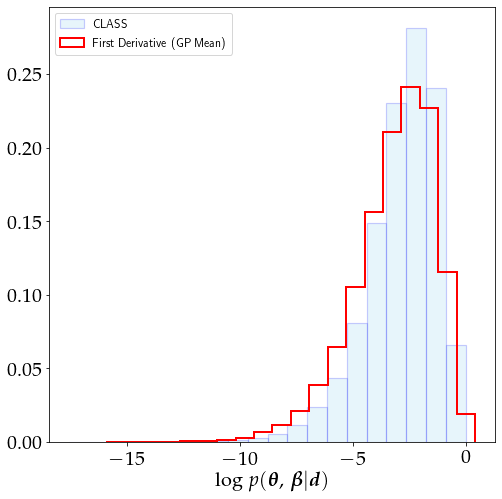

In [5]:
plt.figure(figsize = (8,8))
plt.hist(emcee_class.flatlnprobability - np.max(emcee_class.flatlnprobability), density = True, bins = 20, edgecolor='blue', linewidth=1.2, color = 'skyblue', alpha = 0.2, label = 'CLASS')
plt.hist(emcee_first.flatlnprobability - np.max(emcee_class.flatlnprobability), density = True, bins = 20, edgecolor='red', linewidth=2, histtype='step', label = 'First Derivative (GP Mean)')
#plt.hist(emcee_second.flatlnprobability - np.max(emcee_class.flatlnprobability), density = True, bins = 20, edgecolor='green', linewidth=2, histtype='step', label = 'First Derivative (GP Uncertainty)',linestyle=('dashed'))
#plt.hist(emcee_gp_random_1000.flatlnprobability, density = True, bins = 20, edgecolor='green', linewidth=1.2, histtype='step',linestyle=('dashed'), label = 'GP (Uncertainty - 1000)')
plt.legend(loc='upper left', prop={'size': 12})
plt.xlabel(r'$\textrm{log }p(\boldsymbol{\theta},\,\boldsymbol{\beta}|\boldsymbol{d})$', fontsize = fontSize)
plt.tick_params(axis = 'both', labelsize = fontSize)
# plt.xlim(-15, 1)
#plt.savefig(saveDir+'log_posterior_first_second.pdf', bbox_inches = 'tight')
plt.show()


### Original Plot

In [9]:
ndim     = 11
names    = ["x%s"%i for i in range(ndim)]
labels   =  [r'$\Omega_\textrm{cdm}h^{2}$',r'$\Omega_\textrm{b}h^{2}$', r'$\textrm{ln}(10^{10})A_{\textrm{s}}$', r'$n_s$', r'$h$',r'$A_{bary}$', r'A_{1}', r'A_{2}', r'A_{3}', r'$A_{IA}$', r'$\Sigma m_{\nu}$']

samples1 = MCSamples(samples=emcee_class.flatchain,names = names, labels = labels)
samples2 = MCSamples(samples=emcee_first.flatchain,names = names, labels = labels)
#samples3 = MCSamples(samples=emcee_second.flatchain,names = names, labels = labels)

c1 = '#EEC591'
c2 = 'blue'
c3 = '#8B0000'

alpha    = 0.7
legend_1 = mpatches.Patch(color=c1, label='CLASS', alpha = alpha)
legend_2 = Line2D([0], [0], color=c2, linewidth=3, linestyle='--', label = 'GP Mean')
#legend_3 = Line2D([0], [0], color=c3, linewidth=3, linestyle='-', label = 'First Derivative (GP Uncertainty)')
legend   = [legend_1,legend_2]#,legend_3]

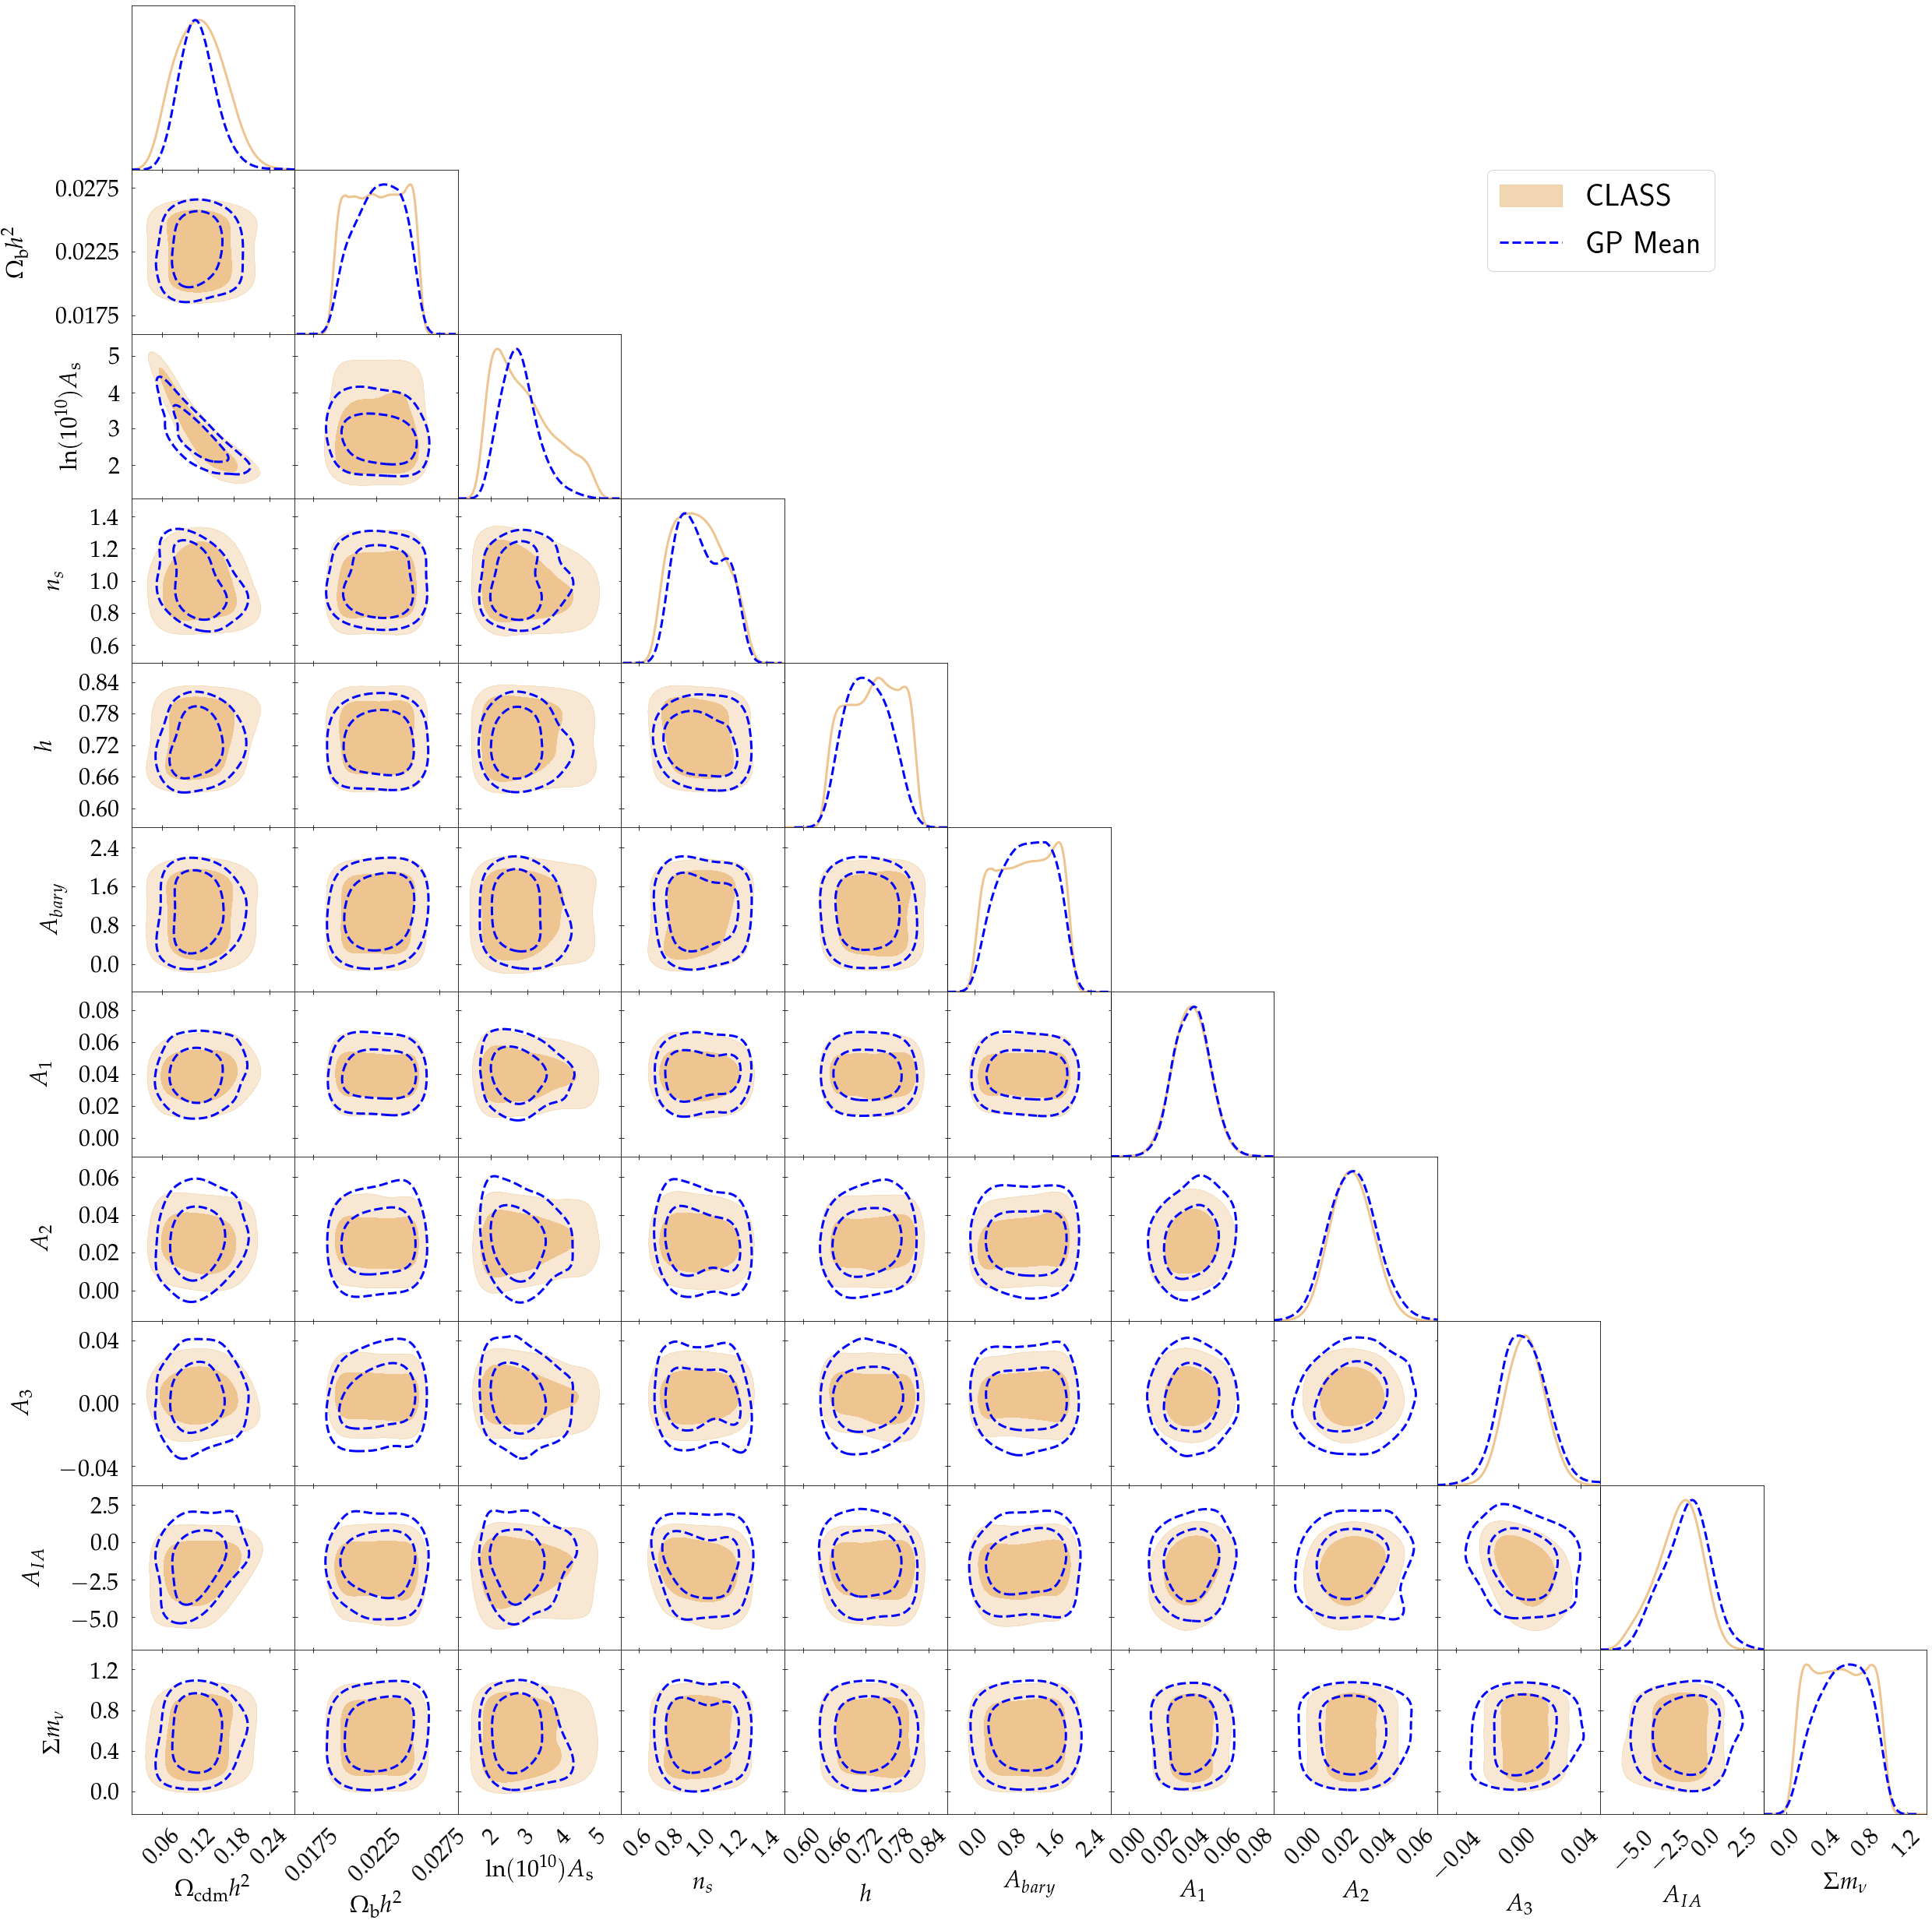

In [10]:
contours = np.array([0.68,0.95])
G = plots.getSubplotPlotter(subplot_size=3)
samples1.updateSettings({'contours': [0.68, 0.95]})
samples2.updateSettings({'contours': [0.68, 0.95]})
#samples3.updateSettings({'contours': [0.68, 0.95]})
G.triangle_plot([samples1], filled = True, line_args={'lw':3, 'color':c1}, contour_colors=[c1])
G.settings.num_plot_contours = 2
# G.settings.font_size = 25
plt.legend(handles=legend, loc = 'best',prop={'size':40}, bbox_to_anchor=(0.7, 10.0), borderaxespad=0.)
G.settings.alpha_filled_add = alpha
for i in range(0,11):
    for j in range(0, i+1):
        if i != j:
            ax = G.subplots[i,j]

#             a, b = G.get_param_array(samples3, ['x'+str(j), 'x'+str(i)])
#             density = G.sampleAnalyser.get_density_grid(samples3, a, b)
#             density.contours = density.getContourLevels(contours)
#             contour_levels = density.contours
#             ax.contour(density.x, density.y, density.P, sorted(contour_levels), colors = c3, linewidths = 3) 

            a, b = G.get_param_array(samples2, ['x'+str(j), 'x'+str(i)])
            density = G.sampleAnalyser.get_density_grid(samples2, a, b)
            density.contours = density.getContourLevels(contours)
            contour_levels = density.contours
            ax.contour(density.x, density.y, density.P, sorted(contour_levels), colors = c2, linewidths = 3, linestyles = '--') 
            
            ax.tick_params(axis = 'x', labelsize = 30, rotation=45, pad=15)
            ax.tick_params(axis = 'y', labelsize = 30, pad=15)
            ax.yaxis.label.set_size(30)
            ax.xaxis.label.set_size(30)
            ax.xaxis.labelpad = 40
            ax.yaxis.labelpad = 30
        else:
            ax = G.subplots[i,j]

#             dense = samples3.get1DDensity('x'+str(i))
#             dense.normalize(by='max')
#             ax.plot(dense.x, dense.P, lw = 3, c = c3)
            
            dense = samples2.get1DDensity('x'+str(i))
            dense.normalize(by='max')
            ax.plot(dense.x, dense.P, lw =3, c = c2, linestyle = '--')
           
            ax.tick_params(axis = 'x', labelsize = 30, rotation=45, pad=15)
            ax.tick_params(axis = 'y', labelsize = 30, pad=15)
            ax.yaxis.label.set_size(30)
            ax.xaxis.label.set_size(30)
            ax.xaxis.labelpad = 40
            ax.yaxis.labelpad = 30
            
# plt.savefig(saveDir+'triangle_plot_original_first_second.pdf', bbox_inches='tight', transparent = False)
plt.show()

### Derived 

In [6]:
# Load file to compute sigma_8 (We just use 1000 training points because we have a 6D problem)
with open(directory+'originalData/Option-4/GPS/gp_sigma.pkl', 'rb') as g:
	sigma_gp = dill.load(g)

In [7]:
def s_om(samples):
    # Compute sigma 
    Nsamples = samples.shape[0]
    sigma    = np.zeros(Nsamples)
    for i in range(Nsamples):
        testpoint = samples[i][[0,1,2,3,4,-1]]
        sigma[i]  = sigma_gp.prediction(testpoint, returnVar = False)
    
    omega_matter = (samples[:,0] + samples[:,1])/samples[:,4]**2
    S_8          = sigma*np.sqrt(omega_matter/0.3)
    s_om_class   = np.vstack((omega_matter, S_8)).T  
    
    # return proper chain for plotting derived quantities 
    otherChain  = [3,4,5,6,7,8,9,10] 
    chain_class = np.concatenate([omega_matter.reshape(Nsamples, 1), sigma.reshape(Nsamples, 1), samples[:,otherChain]], axis = 1)
    return omega_matter, sigma, s_om_class, chain_class

#### CLASS, GP (Mean), GP (Uncertainty)

In [8]:
matter_class, sigma_class, matter_S_class, class_derived = s_om(emcee_class.flatchain)
matter_gp_m, sigma_gp_m, matter_S_gp_m, gp_m_derived = s_om(emcee_gp.flatchain)
matter_gp_u, sigma_gp_u, matter_S_gp_u, gp_u_derived = s_om(emcee_gp_random.flatchain)

In [9]:
ndim     = 10
names    = ["x%s"%i for i in range(ndim)]
labels   = [r'$\Omega_{\textrm{m}}$',r'$\sigma_{8}$', r'$n_s$', r'$h$',r'$A_{bary}$', r'A_{1}', r'A_{2}', r'A_{3}', r'$A_{IA}$', r'$\Sigma m_{\nu}$']

samples1 = MCSamples(samples=class_derived,names = names, labels = labels)
samples2 = MCSamples(samples=gp_m_derived,names = names, labels = labels)
samples3 = MCSamples(samples=gp_u_derived,names = names, labels = labels)

c1 = '#EEC591'
c2 = 'blue'
c3 = '#8B0000'

alpha    = 0.7
legend_1 = mpatches.Patch(color=c1, label='CLASS', alpha = alpha)
legend_2 = Line2D([0], [0], color=c2, linewidth=3, linestyle='--', label = 'GP (Mean)')
legend_3 = Line2D([0], [0], color=c3, linewidth=3, linestyle='-', label = 'GP (Uncertainty)')
legend   = [legend_1,legend_2,legend_3]

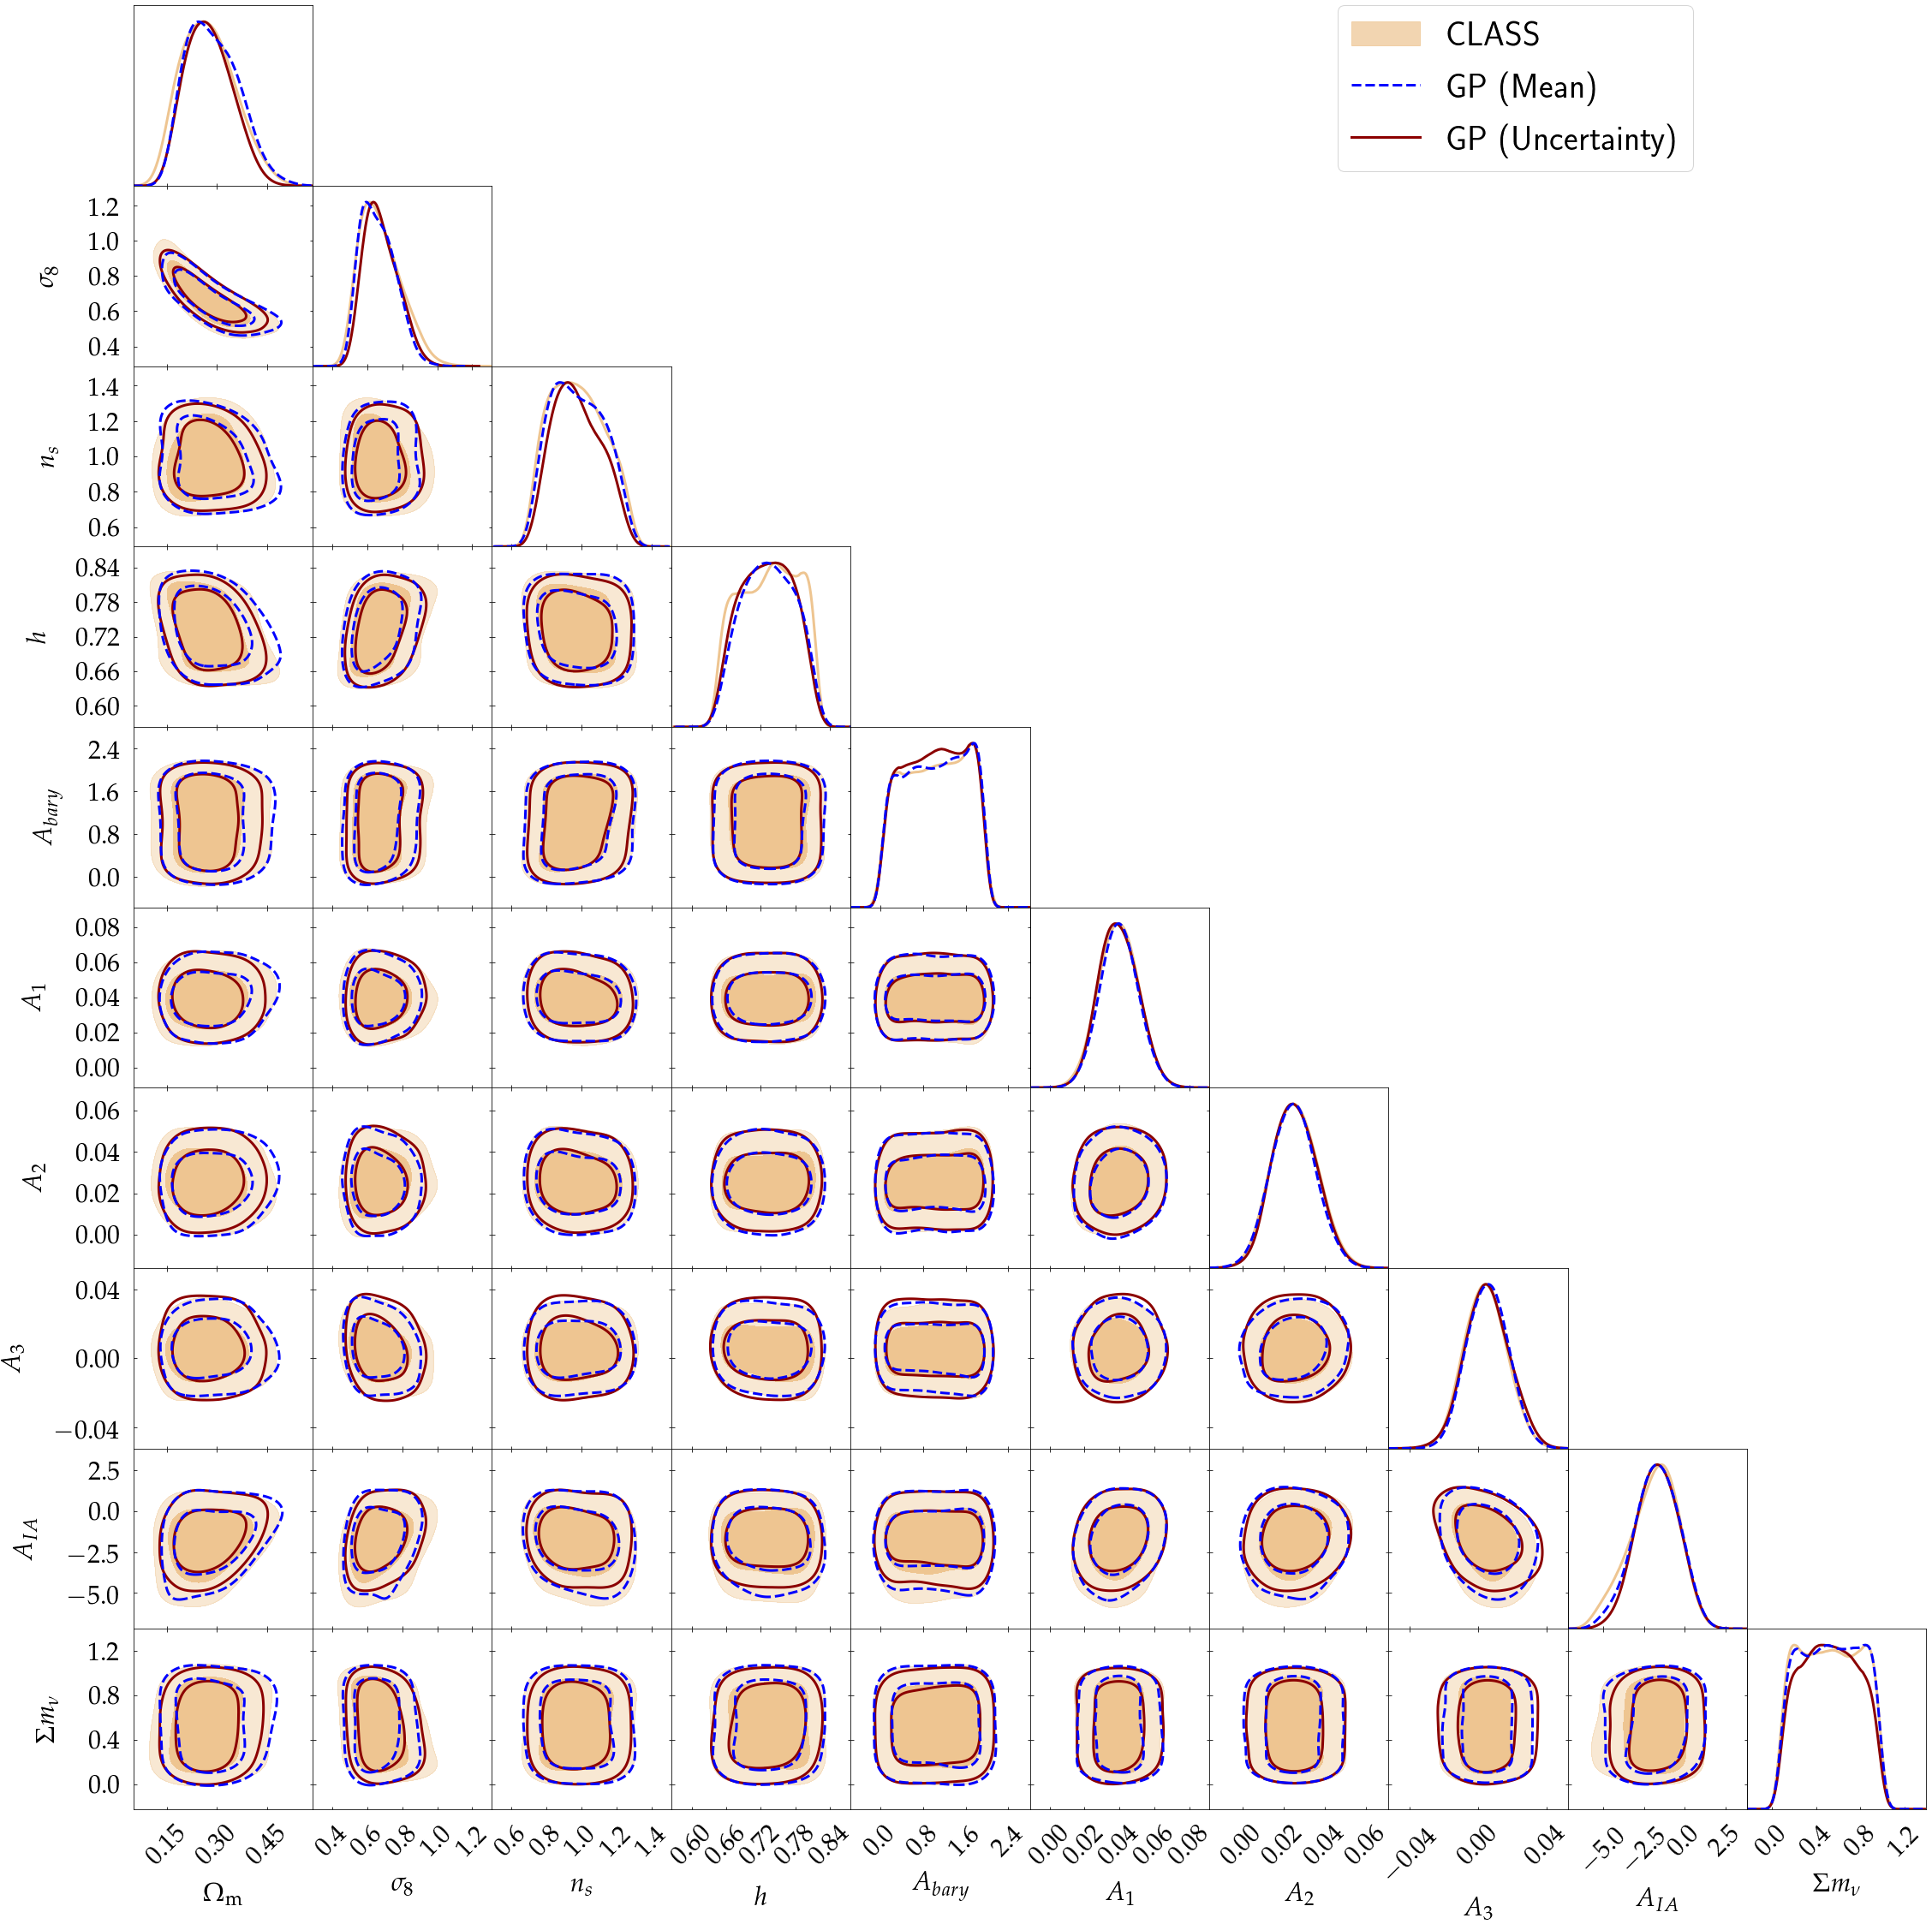

In [10]:
contours = np.array([0.68,0.95])
G = plots.getSubplotPlotter(subplot_size=3)
samples1.updateSettings({'contours': [0.68, 0.95]})
samples2.updateSettings({'contours': [0.68, 0.95]})
samples3.updateSettings({'contours': [0.68, 0.95]})
G.triangle_plot([samples1], filled = True, line_args={'lw':3, 'color':c1}, contour_colors=[c1])
G.settings.num_plot_contours = 2
#G.settings.font_size = 25
plt.legend(handles=legend, loc = 'best',prop={'size':40}, bbox_to_anchor=(0.7, 10.0), borderaxespad=0.)
G.settings.alpha_filled_add = alpha
for i in range(0,10):
    for j in range(0, i+1):
        if i != j:
            ax = G.subplots[i,j]

            a, b = G.get_param_array(samples3, ['x'+str(j), 'x'+str(i)])
            density = G.sampleAnalyser.get_density_grid(samples3, a, b)
            density.contours = density.getContourLevels(contours)
            contour_levels = density.contours
            ax.contour(density.x, density.y, density.P, sorted(contour_levels), colors = c3, linewidths = 3) 

            a, b = G.get_param_array(samples2, ['x'+str(j), 'x'+str(i)])
            density = G.sampleAnalyser.get_density_grid(samples2, a, b)
            density.contours = density.getContourLevels(contours)
            contour_levels = density.contours
            ax.contour(density.x, density.y, density.P, sorted(contour_levels), colors = c2, linewidths = 3, linestyles = '--') 
            
            ax.tick_params(axis = 'x', labelsize = 30, rotation=45, pad=15)
            ax.tick_params(axis = 'y', labelsize = 30, pad=15)
            ax.yaxis.label.set_size(30)
            ax.xaxis.label.set_size(30)
            ax.xaxis.labelpad = 40
            ax.yaxis.labelpad = 30
        else:
            ax = G.subplots[i,j]

            dense = samples3.get1DDensity('x'+str(i))
            dense.normalize(by='max')
            ax.plot(dense.x, dense.P, lw = 3, c = c3)
            
            dense = samples2.get1DDensity('x'+str(i))
            dense.normalize(by='max')
            ax.plot(dense.x, dense.P, lw =3, c = c2, linestyle = '--')
           
            ax.tick_params(axis = 'x', labelsize = 30, rotation=45, pad=15)
            ax.tick_params(axis = 'y', labelsize = 30, pad=15)
            ax.yaxis.label.set_size(30)
            ax.xaxis.label.set_size(30)
            ax.xaxis.labelpad = 40
            ax.yaxis.labelpad = 30
            
plt.savefig(saveDir+'MOPED/moped_posterior_derived_'+str(Ntrain)+'.pdf', bbox_inches='tight', transparent = False)
plt.show()

### $S_{8}$ vs $\Omega_{m}$ Plot 

 /home/harry/anaconda3/lib/python3.6/site-packages/getdist/plots.py:959: UserWarning:The following kwargs were not used by contour: 'color', 'ls'


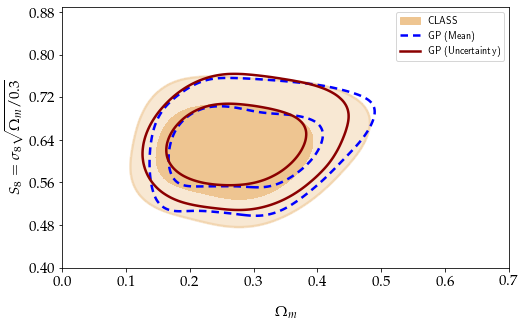

In [11]:
legend = ['CLASS','GP (Mean)', 'GP (Uncertainty)']
names  = ["x%s"%i for i in range(2)]
labels =  [r'$\Omega_{m}$', r'$S_{8}=\sigma_{8}\sqrt{\Omega_{m}/0.3}$']

# matter_S_class
# matter_S_gp_m
# matter_S_gp_u

samples1 = MCSamples(samples=matter_S_class,names = names, labels = labels)
samples2 = MCSamples(samples=matter_S_gp_m,names = names, labels = labels)
samples3 = MCSamples(samples=matter_S_gp_u,names = names, labels = labels)

G = plots.getSinglePlotter(width_inch=8, ratio=3 / 5.)
G.settings.num_plot_contours = 2
G.settings.lw_contour = 2.5
G.settings.axes_fontsize = 15
G.settings.lab_fontsize = 15
G.settings.font_size = 25 # important for padding in x-axis 
G.settings.alpha_filled_add = 0.6
G.settings.legend_fontsize = 10

samples1.updateSettings({'contours': [0.68, 0.95]})
samples2.updateSettings({'contours': [0.68, 0.95]})
samples3.updateSettings({'contours': [0.68, 0.95]})

G.plot_2d([samples1], 'x0', 'x1', filled=True, colors =[c1], lims = [0.0, 0.7, 0.4, 0.89])
G.plot_2d([samples2], 'x0', 'x1', colors = [c2], ls = ['--'], lims = [0.0, 0.7, 0.4, 0.89])
G.plot_2d([samples3], 'x0', 'x1', colors = [c3], ls = ['-'], lims = [0.0, 0.7, 0.4, 0.89])
G.add_legend(legend, legend_loc='upper right')
plt.savefig(saveDir+'MOPED/moped_S8_matter_'+str(Ntrain)+'.pdf', bbox_inches='tight', transparent = False)
plt.show()